# Communities and Crime

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import math # Para valores NaN
import matplotlib.pyplot as plt

In [2]:
# Fijamos la semilla
np.random.seed(1)

In [3]:
header = ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 
          'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 
          'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 
          'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 
          'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
          'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 
          'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ',
          'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 
          'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 
          'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 
          'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 
          'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 
          'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 
          'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 
          'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 
          'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 
          'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
          'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState',
          'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop',
          'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 
          'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack',
          'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
          'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 
          'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop',
          'ViolentCrimesPerPop'] 
        #ViolentCrimesPerPop: total number of violent crimes per 100K popuation - GOAL attribute (to be predicted)
df = pd.read_csv('datos/communities.data', names=header)
df.head(10)

state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   
5      6      ?         ?    SouthPasadenacity     1        0.02   
6     44      7     41500          Lincolntown     1        0.01   
7      6      ?         ?            Selmacity     1        0.01   
8     21      ?         ?        Hendersoncity     1        0.03   
9     29      ?         ?          Claytoncity     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   
5           0.28          0.06          0.54          1.00  ...      0.01   
6           0.39          0.00          0.98          0.06  ...      0.05   
7           0.74          0.03          0.46          0.20  ...      0.01   
8           0.34          0.20          0.84          0.02  ...      0.04   
9           0.40          0.06          0.87          0.30  ...      0.00   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06           0.04                  0.9   
1     0.12            0.45          ?              ?                    ?   
2     0.21            0.02          ?              ?                    ?   
3     0.39            0.28          ?              ?                    ?   
4     0.09            0.02          ?              ?                    ?   
5     0.58            0.10          ?              ?                    ?   
6     0.08            0.06          ?              ?                    ?   
7     0.33            0.00          ?              ?                    ?   
8     0.17            0.04          ?              ?                    ?   
9     0.47            0.11          ?              ?                    ?   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                  0.5                 0.32             0.14   
1                    ?                 0.00                ?   
2                    ?                 0.00                ?   
3                    ?                 0.00                ?   
4                    ?                 0.00                ?   
5                    ?                 0.00                ?   
6                    ?                 0.00                ?   
7                    ?                 0.00                ?   
8                    ?                 0.00                ?   
9                    ?                 0.00                ?   

   ViolentCrimesPerPop  
0                 0.20  
1                 0.67  
2                 0.43  
3                 0.12  
4                 0.03  
5                 0.14  
6                 0.03  
7                 0.55  
8                 0.53  
9                 0.15  

[10 rows x 128 columns]

In [4]:
# Reemplazamos los valores ? por NaN en Python, para que funcione la función isnull()
df.replace({'?': math.nan}, inplace = True)
df

state county community        communityname  fold  population  \
0         8    NaN       NaN         Lakewoodcity     1        0.19   
1        53    NaN       NaN          Tukwilacity     1        0.00   
2        24    NaN       NaN         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1989     12    NaN       NaN    TempleTerracecity    10        0.01   
1990      6    NaN       NaN          Seasidecity    10        0.05   
1991      9      9     80070        Waterburytown    10        0.16   
1992     25     17     72600          Walthamcity    10        0.08   
1993      6    NaN       NaN          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                  0.9   
1        0.12            0.45        NaN            NaN                  NaN   
2        0.21            0.02        NaN            NaN                  NaN   
3        0.39            0.28        NaN            NaN                  NaN   
4        0.09            0.02        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05        NaN            NaN                  NaN   
1990     0.37            0.20        NaN            NaN                  NaN   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                     NaN                 0.00              NaN   
2                     NaN                 0.00              NaN   
3                     NaN                 0.00              NaN   
4                     NaN                 0.00              NaN   
...                   ...                  ...              ...   
1989                  NaN                 0.00              NaN   
1990                  NaN                 0.00              NaN   
1991                    0                 0.91             0.28   
1992                    0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

In [5]:
# Estadísticas de los datos leídos
print("El número de instancias del dataset: {}".format(df.shape[0]))
print("El número de atributos del dataset: {}".format(df.shape[1]))

El número de instancias del dataset: 1994
El número de atributos del dataset: 128


In [6]:
# Importamos la librería para dibujar el gráfico
import plotly.graph_objects as go

# Agrupamos por estados los crímenes violentos y calculamos su media
crimedata_state = df.groupby('state').agg({'ViolentCrimesPerPop':'mean'})[['ViolentCrimesPerPop']].reset_index()

# Definimos los estados
codigo_estados = {1: 'AL', 2: 'AK', 3:'', 4:'AZ', 5:'AR', 6:'CA', 7:'', 8:'CO', 9:'CT', 10:'DE', 11:'DC',
            12:'FL', 13:'GA', 14:'', 15:'', 16:'ID', 17:'', 18:'IN', 19:'IA', 20:'KS', 21:'KY',
            22:'LA', 23:'ME', 24:'MD', 25:'MA', 26:'', 27:'MN', 28:'MS', 29:'MO', 30:'', 31:'',
            32:'NV', 33:'NH', 34:'NJ', 35:'NM', 36:'NY', 37:'NC', 38:'ND', 39:'OH', 40:'OK', 41:'OR',
            42:'PA', 43:'', 44:'RI', 45:'SC', 46:'SD', 47:'TN', 48:'TX', 49:'UT', 50:'VT', 51:'VA',
            52:'', 53:'WA', 54:'WV', 55:'WI', 56:'WY'}

array_codigo = np.array(list(codigo_estados.values()))

ViolentCrimesPerPop_porEstado = []
j = 0
for i in range (len(array_codigo)):
    if (array_codigo[i] == ''):
        ViolentCrimesPerPop_porEstado.append(None)
    else:
        ViolentCrimesPerPop_porEstado.append(crimedata_state['ViolentCrimesPerPop'][j])
        j = j + 1


fig = go.Figure(data=go.Choropleth(
    locations=array_codigo, # Spatial coordinates
    z = ViolentCrimesPerPop_porEstado, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Ratio de crímenes violentos por estado",
    colorbar_titleside  = 'right',
    colorbar_ticks = 'outside'
))

fig.update_layout(
    title_text = '1990 US: Media de crímenes por condado agrupados por estado normalizados',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [7]:
# Vemos el tipo de las columnas de nuestro dataset:
print("Tipo de los atributos: \n{}".format(df.dtypes.value_counts()))

Tipo de los atributos: 
float64    100
object      26
int64        2
dtype: int64


In [8]:
# Como el dataset incluía '?' para los valores perdidos, el tipo de la columna se ha mantenido
# Vamos a cambiar el tipo de dichas columnas, menos de 'communityname', que debe ser tipo cadena
columnas_objeto = df.select_dtypes(include=['object']).columns
columnas_objeto = columnas_objeto.delete(np.where(columnas_objeto == 'communityname'))
# Modificamos el tipo de las columnas con valores categóricos, interpretando los errores por NaN
df[columnas_objeto] = df[columnas_objeto].apply(pd.to_numeric, errors = 'coerce')
print("Tipo de los atributos: \n{}".format(df.dtypes.value_counts()))
df

Tipo de los atributos: 
float64    125
int64        2
object       1
dtype: int64


state  county  community        communityname  fold  population  \
0         8     NaN        NaN         Lakewoodcity     1        0.19   
1        53     NaN        NaN          Tukwilacity     1        0.00   
2        24     NaN        NaN         Aberdeentown     1        0.00   
3        34     5.0    81440.0  Willingborotownship     1        0.04   
4        42    95.0     6096.0    Bethlehemtownship     1        0.01   
...     ...     ...        ...                  ...   ...         ...   
1989     12     NaN        NaN    TempleTerracecity    10        0.01   
1990      6     NaN        NaN          Seasidecity    10        0.05   
1991      9     9.0    80070.0        Waterburytown    10        0.16   
1992     25    17.0    72600.0          Walthamcity    10        0.08   
1993      6     NaN        NaN          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                 0.90   
1        0.12            0.45        NaN            NaN                  NaN   
2        0.21            0.02        NaN            NaN                  NaN   
3        0.39            0.28        NaN            NaN                  NaN   
4        0.09            0.02        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05        NaN            NaN                  NaN   
1990     0.37            0.20        NaN            NaN                  NaN   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                     NaN                 0.00              NaN   
2                     NaN                 0.00              NaN   
3                     NaN                 0.00              NaN   
4                     NaN                 0.00              NaN   
...                   ...                  ...              ...   
1989                  NaN                 0.00              NaN   
1990                  NaN                 0.00              NaN   
1991                  0.0                 0.91             0.28   
1992                  0.0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

In [9]:
def valores_perdidos(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Porcentaje'])
    return missing_data
missing_data = valores_perdidos(df)
print('Valores perdidos:\n')
missing_data[missing_data['Total'] > 0].head(13)

Valores perdidos:



Total  Porcentaje
LemasSwFTFieldOps      1675     0.84002
PctPolicAsian          1675     0.84002
PolicBudgPerPop        1675     0.84002
LemasSwornFT           1675     0.84002
LemasSwFTPerPop        1675     0.84002
LemasSwFTFieldPerPop   1675     0.84002
LemasTotalReq          1675     0.84002
LemasTotReqPerPop      1675     0.84002
PolicReqPerOffic       1675     0.84002
PolicPerPop            1675     0.84002
PctPolicWhite          1675     0.84002
PctPolicBlack          1675     0.84002
PctPolicHisp           1675     0.84002

In [10]:
# Vemos cual es el estado donde tenemos el valor perdido de OtherPerCap
estado = df[df['OtherPerCap'].isna()]['state'].values[0]
# Obtenemos todos los valores de OtherPerCap de dicho estado
valores_estado = df[df['state'] == estado]['OtherPerCap'].values
# Eliminamos el valor NaN de los valores obtenidos
valores_estado = valores_estado[~pd.isnull(valores_estado)]
valores_estado = valores_estado.astype(np.float)
# Calculamos la media de dichos valores
media = valores_estado.mean()
# Rellenamos el valor perdido con la media calculada
indice_fila = df[df['OtherPerCap'].isna()].index[0]
pd.set_option('mode.chained_assignment', None)
df.loc[indice_fila, 'OtherPerCap'] = media
# Comprobamos que se ha rellenado dicho valor:
missing_data = valores_perdidos(df)
print('Valores perdidos:\n')
print(missing_data[missing_data['Total'] > 0])
columnas_eliminadas = missing_data[missing_data['Total'] > 0].index

Valores perdidos:

                      Total  Porcentaje
LemasSwFTFieldOps      1675    0.840020
PctPolicAsian          1675    0.840020
PolicBudgPerPop        1675    0.840020
LemasSwornFT           1675    0.840020
LemasSwFTPerPop        1675    0.840020
LemasSwFTFieldPerPop   1675    0.840020
LemasTotalReq          1675    0.840020
LemasTotReqPerPop      1675    0.840020
PolicReqPerOffic       1675    0.840020
PolicPerPop            1675    0.840020
PctPolicWhite          1675    0.840020
PctPolicBlack          1675    0.840020
PctPolicHisp           1675    0.840020
RacialMatchCommPol     1675    0.840020
PctPolicMinor          1675    0.840020
PolicCars              1675    0.840020
LemasGangUnitDeploy    1675    0.840020
OfficAssgnDrugUnits    1675    0.840020
PolicOperBudg          1675    0.840020
LemasPctPolicOnPatr    1675    0.840020
PolicAveOTWorked       1675    0.840020
NumKindsDrugsSeiz      1675    0.840020
community              1177    0.590271
county               

In [11]:
# Eliminamos ahora todas las demas columnas con valores perdidos:
df.dropna(axis = 1, inplace = True)
# Comprobamos que se han eliminado:
missing_data = valores_perdidos(df)
print('Valores perdidos:\n')
print(missing_data[missing_data['Total'] > 0])
# Comprobamos ahora el número de atributos e instancias de nuestro dataset en este momento del preprocesamiento:
print("\nEl número de instancias en este momento es de: {}".format(df.shape[0]))
print("El número de atributos en este momento es de: {}".format(df.shape[1]))

Valores perdidos:

Empty DataFrame
Columns: [Total, Porcentaje]
Index: []

El número de instancias en este momento es de: 1994
El número de atributos en este momento es de: 104


In [12]:
df.describe()
df

state        communityname  fold  population  householdsize  \
0         8         Lakewoodcity     1        0.19           0.33   
1        53          Tukwilacity     1        0.00           0.16   
2        24         Aberdeentown     1        0.00           0.42   
3        34  Willingborotownship     1        0.04           0.77   
4        42    Bethlehemtownship     1        0.01           0.55   
...     ...                  ...   ...         ...            ...   
1989     12    TempleTerracecity    10        0.01           0.40   
1990      6          Seasidecity    10        0.05           0.96   
1991      9        Waterburytown    10        0.16           0.37   
1992     25          Walthamcity    10        0.08           0.51   
1993      6          Ontariocity    10        0.20           0.78   

      racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  ...  \
0             0.02          0.90          0.12         0.17         0.34  ...   
1             0.12          0.74          0.45         0.07         0.26  ...   
2             0.49          0.56          0.17         0.04         0.39  ...   
3             1.00          0.08          0.12         0.10         0.51  ...   
4             0.02          0.95          0.09         0.05         0.38  ...   
...            ...           ...           ...          ...          ...  ...   
1989          0.10          0.87          0.12         0.16         0.43  ...   
1990          0.46          0.28          0.83         0.32         0.69  ...   
1991          0.25          0.69          0.04         0.25         0.35  ...   
1992          0.06          0.87          0.22         0.10         0.58  ...   
1993          0.14          0.46          0.24         0.77         0.50  ...   

      PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0               0.12              0.42            0.50           0.51   
1               0.21              0.50            0.34           0.60   
2               0.14              0.49            0.54           0.67   
3               0.19              0.30            0.73           0.64   
4               0.11              0.72            0.64           0.61   
...              ...               ...             ...            ...   
1989            0.22              0.28            0.34           0.48   
1990            0.53              0.25            0.17           0.10   
1991            0.25              0.68            0.61           0.79   
1992            0.45              0.64            0.54           0.59   
1993            0.68              0.50            0.34           0.35   

      PctSameState85  LandArea  PopDens  PctUsePubTrans  LemasPctOfficDrugUn  \
0               0.64      0.12     0.26            0.20                 0.32   
1               0.52      0.02     0.12            0.45                 0.00   
2               0.56      0.01     0.21            0.02                 0.00   
3               0.65      0.02     0.39            0.28                 0.00   
4               0.53      0.04     0.09            0.02                 0.00   
...              ...       ...      ...             ...                  ...   
1989            0.39      0.01     0.28            0.05                 0.00   
1990            0.00      0.02     0.37            0.20                 0.00   
1991            0.76      0.08     0.32            0.18                 0.91   
1992            0.52      0.03     0.38            0.33                 0.22   
1993            0.68      0.11     0.30            0.05                 1.00   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 104 columns]

In [13]:
df.drop(['state', 'communityname', 'fold'], axis=1, inplace = True)
# Comprobamos ahora el número de atributos e instancias de nuestro dataset en este momento del preprocesamiento:
print("\nEl número de instancias en este momento es de: {}".format(df.shape[0]))
print("El número de atributos en este momento es de: {}".format(df.shape[1]))


El número de instancias en este momento es de: 1994
El número de atributos en este momento es de: 101


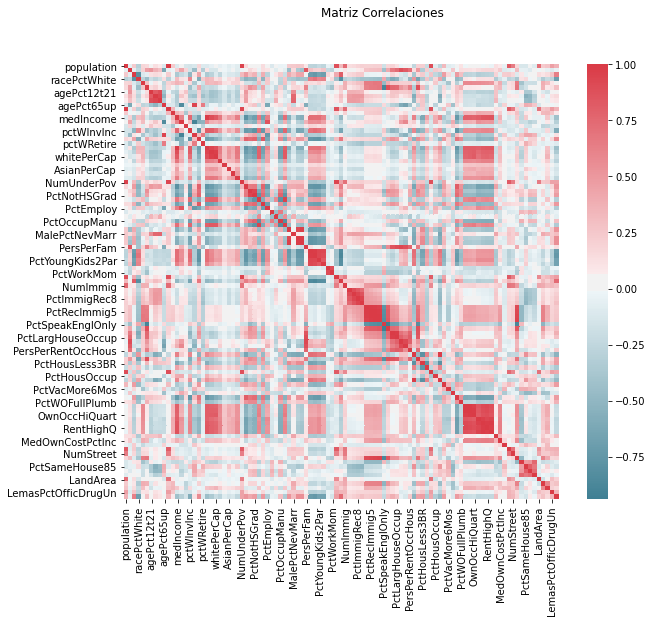

In [14]:
import seaborn as sns
def matriz_correlaciones(datos):
    f, ax = plt.subplots(figsize=(10, 8))
    corr = datos.corr(method = 'pearson')
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)
    f.suptitle('Matriz Correlaciones')
matriz_correlaciones(df)


In [15]:
corr_matrix = df.corr(method = 'pearson').abs() # Matriz de correlación en valor absoluto

# Seleccionamos la matriz triangular superior de la matriz de correlación anterior
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Buscamos la columnas con una correlacion mayor que 0.95 con alguna otra
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['numbUrban',
 'medFamInc',
 'whitePerCap',
 'PctOccupMgmtProf',
 'TotalPctDiv',
 'PctKids2Par',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctLargHouseOccup',
 'PctHousOwnOcc',
 'OwnOccMedVal',
 'OwnOccHiQuart',
 'RentMedian',
 'RentHighQ',
 'MedRent',
 'PctForeignBorn']

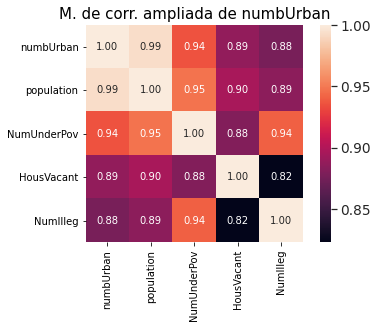

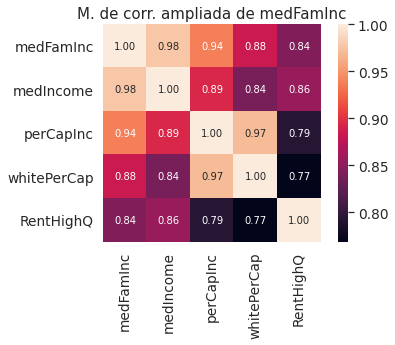

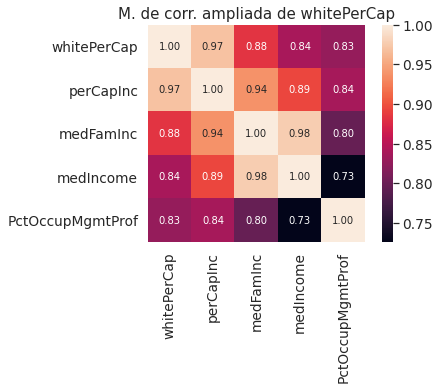

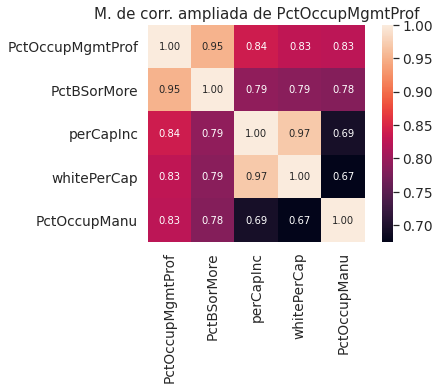

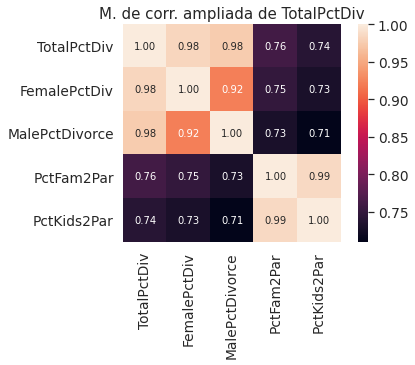

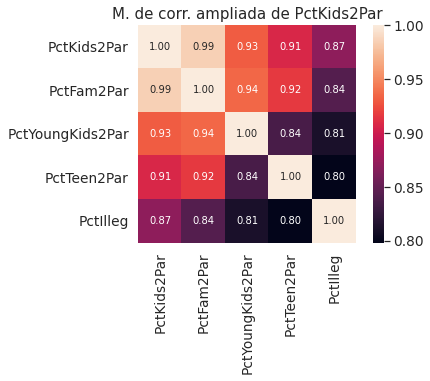

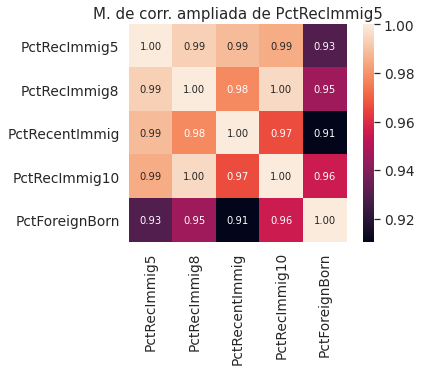

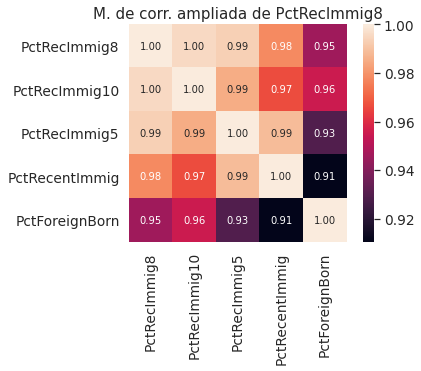

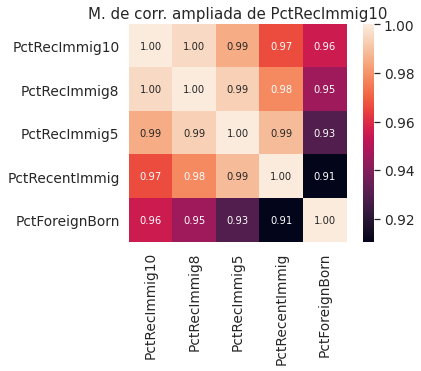

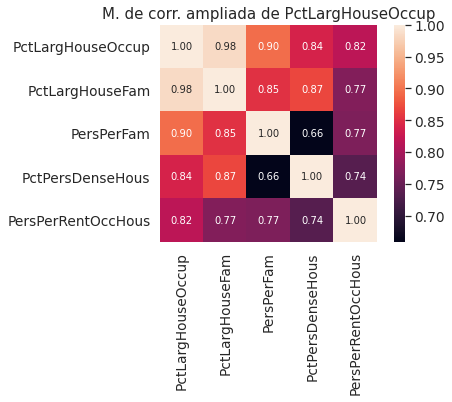

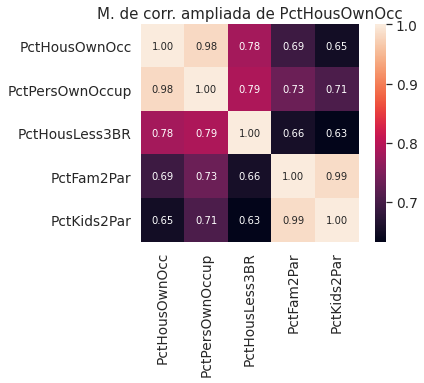

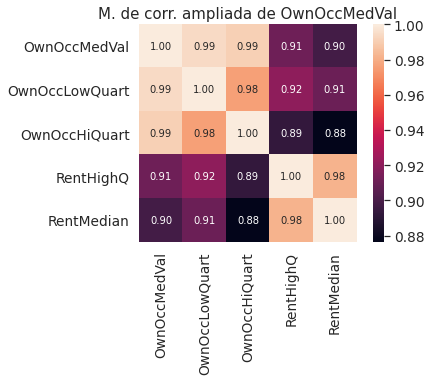

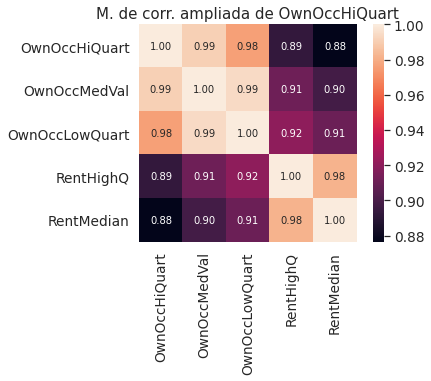

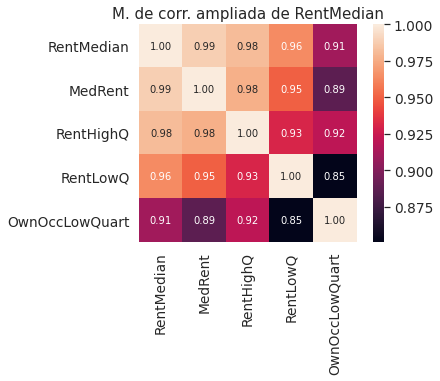

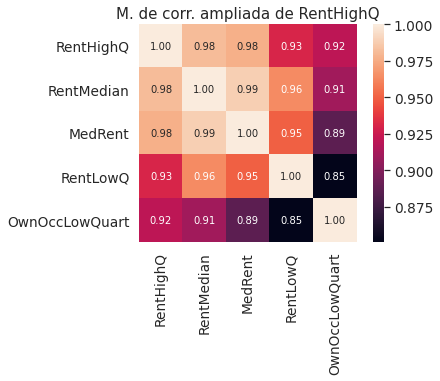

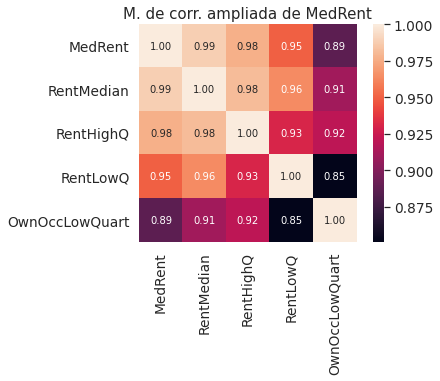

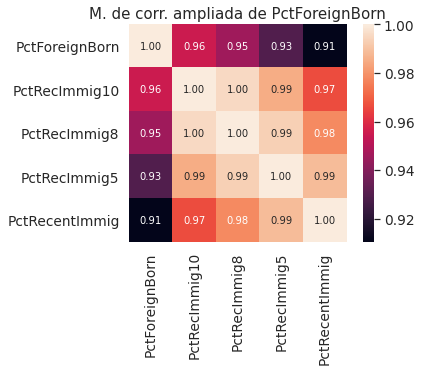

In [16]:
# Matriz de correlación
k = 5 # Número de variables.
for i in to_drop:
    cols = corr_matrix.nlargest(k, i)[i].index
    cm = np.abs(np.corrcoef(df[cols].values.T))
    ax = plt.axes()
    sns.set(font_scale = 1.25)
    hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
    ax.set_title('M. de corr. ampliada de {}'.format(i))
    plt.show()


El número de instancias en este momento es de: 1994
El número de atributos en este momento es de: 86


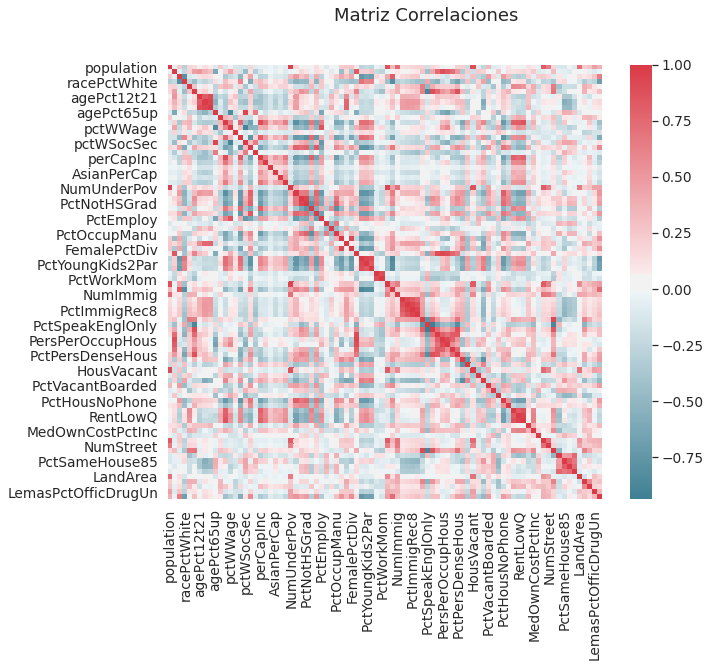

In [17]:
df.drop(['numbUrban', 'medFamInc', 'whitePerCap', 'PctOccupMgmtProf', 
             'TotalPctDiv', 'PctFam2Par', 'PctRecImmig8', 'PctRecImmig5',
             'PctRecImmig10', 'PctLargHouseFam', 'PctPersOwnOccup',
             'OwnOccLowQuart', 'OwnOccHiQuart', 'RentMedian', 'RentHighQ'], axis=1, inplace = True)
# Comprobamos ahora el número de atributos e instancias de nuestro dataset en este momento del preprocesamiento:
print("\nEl número de instancias en este momento es de: {}".format(df.shape[0]))
print("El número de atributos en este momento es de: {}".format(df.shape[1]))
matriz_correlaciones(df)

In [18]:
# Variables que explican la variable objetivo ordenadas por aportación
corr_matrix[['ViolentCrimesPerPop']].sort_values(by = 'ViolentCrimesPerPop',ascending = False)\
    .style.background_gradient()

In [19]:
# Separamos el dataset original en atributos y etiquetas:
X = df.iloc[:,:-1] # Todas las columnas menos la última
y = df.iloc[:, -1] # Última columna
y_df = pd.DataFrame(data=y)

In [20]:
y

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

In [21]:
# Dividimos los conjuntos en test (25 %) y train (75 %)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

# Estadísticas de los datos leídos
n_train = X_train.shape[0]
n_test = X_test.shape[0]
porcentaje_train = 100*n_train/(n_test+n_train)
porcentaje_test = 100*n_test/(n_test+n_train)
print("El número de instancias de entrenamiento es de: {}".format(X_train.shape[0]))
print("El número de instancias de test es de: {}".format(X_test.shape[0]))
print("Porcentaje de train: {} y porcentaje de test: {}".format(
    porcentaje_train, porcentaje_test))

El número de instancias de entrenamiento es de: 1495
El número de instancias de test es de: 499
Porcentaje de train: 74.97492477432297 y porcentaje de test: 25.025075225677032


In [22]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import Ridge
# Create a switcher class that works for any estimator 
# (codigo extraído de https://stackoverflow.com/questions/50285973/pipeline-multiple-classifiers
# y adaptado a nuestro problema)
class ClfSwitcher(BaseEstimator):
    def __init__(
        self, 
        estimator = Ridge(),
    ):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 

        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocesado = [("escalado", StandardScaler())]

preprocesador = Pipeline(preprocesado)
preprocesador

Pipeline(memory=None,
         steps=[('escalado',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
import warnings
warnings.filterwarnings('ignore')
# Fijamos la semilla
np.random.seed(1)


pipeline = Pipeline(steps=[('preprocesador', preprocesador),
                      ('clf', ClfSwitcher())])

parameters = [
    {
        'clf__estimator': [Ridge(solver = 'sparse_cg', tol = 1e-7)],
        'clf__estimator__alpha': [10.0, 2.0, 1.0, 0.1, 0.01, 0.001]
    },
    {
        'clf__estimator': [SGDRegressor(loss="squared_loss",
                           penalty="l2",
                           tol=1e-7,
                           learning_rate = 'invscaling',
                           max_iter = 2000)],
        'clf__estimator__alpha': [10.0, 2.0, 1.0, 0.1, 0.01, 0.001],
        'clf__estimator__eta0': [1.0, 0.5, 0.2, 0.1, 0.05],
        'clf__estimator__power_t': [0.3, 0.25, 0.2]
    }
]

grid = GridSearchCV(pipeline, parameters, cv=5) # Cross-validation para elegir hiperparámetros
grid.fit(X_train, y_train)
clasificador = grid.best_estimator_
E_val = 1 - grid.best_score_
E_in = 1 - clasificador.score(X_train, y_train)

In [25]:
parametros = clasificador['clf'].get_params
print("Parámetros del clasificador: {}".format(parametros))

Parámetros del clasificador: <bound method BaseEstimator.get_params of ClfSwitcher(estimator=Ridge(alpha=10.0, copy_X=True, fit_intercept=True,
                            max_iter=None, normalize=False, random_state=None,
                            solver='sparse_cg', tol=1e-07))>


In [26]:
print("R^2: {}".format(clasificador.score(X_train, y_train)))
print("E_in: {}".format(E_in))
print('E_val: {}'.format(E_val))
E_test = 1 - clasificador.score(X_test, y_test)
print("E_test: {}".format(E_test))

R^2: 0.7029625929614456
E_in: 0.2970374070385544
E_val: 0.3370830014499828
E_test: 0.36873809028676086


In [27]:
import math
def cota_Eout(E_test, delta):
    N = X_test.shape[0]
    cota = E_test + math.sqrt((1/(2*N))*math.log(2/delta))
    return cota
print("E_out: {}".format(cota_Eout(E_test, delta = 0.05)))

E_out: 0.42953506388010804


In [28]:
# Definimos el clasificador
from sklearn.svm import LinearSVR

svr = LinearSVR(dual = False, loss = 'squared_epsilon_insensitive', tol = 1e-7)

svr_pipe = Pipeline(steps=[('clf', svr)])
                                    
params_svr = {'clf__C': [10.0, 2.0, 1.0, 0.1, 0.01, 0.001],
              'clf__epsilon': [0.0, 0.01, 0.05, 0.1]}

grid_svr = GridSearchCV(svr_pipe, params_svr, cv=5) # Cross-validation para elegir hiperparámetros
grid_svr.fit(X_train, y_train)
clasificador_svr = grid_svr.best_estimator_
E_val_svr = 1 - grid_svr.best_score_
E_in_svr = 1 - clasificador_svr.score(X_train, y_train)

In [29]:
parametros_svr = clasificador_svr['clf'].get_params
print("Parámetros del clasificador: {}".format(parametros_svr))

Parámetros del clasificador: <bound method BaseEstimator.get_params of LinearSVR(C=1.0, dual=False, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='squared_epsilon_insensitive',
          max_iter=1000, random_state=None, tol=1e-07, verbose=0)>


In [30]:
print("E_in: {}".format(E_in_svr))
print('E_val: {}'.format(E_val_svr))
E_test_svr = 1 - clasificador_svr.score(X_test, y_test)
print("E_test: {}".format(E_test_svr))
print("E_out: {}".format(cota_Eout(E_test_svr, delta = 0.05)))

E_in: 0.29833317481994337
E_val: 0.33690061282617145
E_test: 0.3694129602032036
E_out: 0.43020993379655076
